In [1]:
import datacube
import xarray as xr

In [2]:
dc = datacube.Datacube()

In [3]:
products = dc.list_products()
products

,name,description,license,default_crs,default_resolution
name,,,,,
s1_compass_isce3_backscatter,s1_compass_isce3_backscatter,Sample CSLC backscatter from COMPASS-ISCE3,None,EPSG:32756,"Resolution(x=20, y=-20)"


In [4]:
measurements = dc.list_measurements()
measurements

,,name,dtype,units,nodata
product,measurement,,,,
s1_compass_isce3_backscatter,backscatter,backscatter,float32,1,NaN


Querying product Product(name='s1_compass_isce3_backscatter', id_=1)
Failed to resolve driver datacube.plugins.io.read::netcdf
Error was: ModuleNotFoundError("No module named 'netCDF4'")


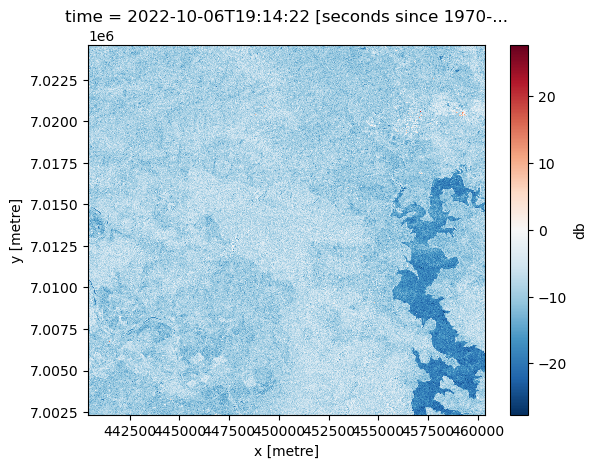

In [5]:
centre_latitude = -27.0
centre_longitude = 152.5
buffer = 0.1

latitude = (centre_latitude-buffer,centre_latitude+buffer)
longitude = (centre_longitude-buffer, centre_longitude+buffer)

data = dc.load(
    product = "s1_compass_isce3_backscatter",
    latitude = latitude,
    longitude = longitude,
    time = "2022",
    group_by = 'solar_day',
    output_crs = 'EPSG:32756',
    resolution = 20,
)

data["db"] = 10 * xr.ufuncs.log10(data.backscatter)

data.db.plot()